![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Predicción producción de toneladas de café diaria**

**Series de tiempo** <br>

Profesor: Wilson Sandoval Rodriguez <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

__GRUPO 4__ <br>
- Daniel Mauricio Cardenas<br>
- Luisa Fernanda Rodriguez

![Tarea](https://file.notion.so/f/f/f34f306e-d9b5-494b-b818-5da09ff1677a/8ec70526-7346-4038-af12-aecbfc968fd2/image.png?table=block&id=111552c0-2d01-80ed-b486-de7d3fff6db1&spaceId=f34f306e-d9b5-494b-b818-5da09ff1677a&expirationTimestamp=1727827200000&signature=FRTD8cTXDHdItIfpAcorwW5HuawMCywhFPWqJVqDR1o&downloadName=image.png)

# Preliminares

Librerias y modulos personalizados a utilizar:


La data a utilizar esta en el siguiente enlace [Cafe.xlsx](https://github.com/Wilsonsr/Series-de-Tiempo/blob/main/bases/cafe.xlsx)

In [1]:
# Cargar el archivo utils.py, este archivo contiene las librerias necesarias y algunos modulos a utilizar en el proceso

from utils import *

/home/danielcardenas/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Cargar el DataSet Cafe.xlsx

url = ("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/bases/cafe.xlsx") # Url del archivo

df = cargar_dataset(url,sheet_name='Hoja1') # Modulo para cargue de archivos .csv y .xlsx

df.head(10) # Mostrar la información del df

Archivo Excel cargado exitosamente: 295 filas, 2 columnas


,fecha,Toneladas
0,2000-01-01,658.0
1,2000-02-01,740.0
2,2000-03-01,592.0
3,2000-04-01,1055.0
4,2000-05-01,1114.0
5,2000-06-01,1092.0
6,2000-07-01,811.0
7,2000-08-01,436.0
8,2000-09-01,501.0
9,2000-10-01,940.0


In [3]:
#Validar el tipo de datos de cada columna y si tiene datos nulos

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      295 non-null    datetime64[ns]
 1   Toneladas  295 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [4]:
# Ajustar el df para que sea una serie de tiempo

df.index = df['fecha'] # Definir la columna fecha como index
df.drop(columns=['fecha'],inplace=True) # Eliminar la columna fecha
df

,Toneladas
fecha,
2000-01-01,658.000000
2000-02-01,740.000000
2000-03-01,592.000000
2000-04-01,1055.000000
2000-05-01,1114.000000
...,...
2024-03-01,865.532563
2024-04-01,742.000000
2024-05-01,1120.000000


# Entendimiento de los datos

- Graficar la serie de tiempo original
- Descomponer la serie de tiempo original

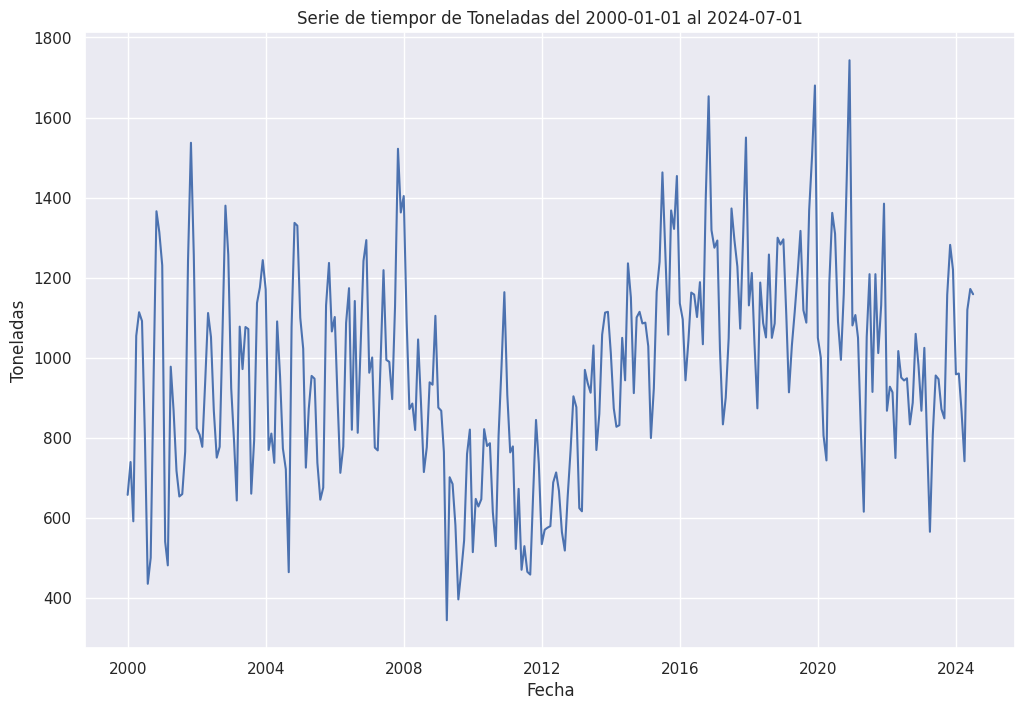

In [5]:
serie_de_tiempo(df,'Toneladas')

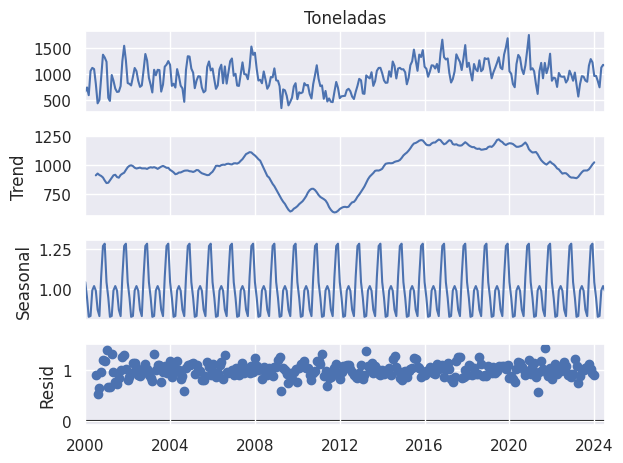

In [6]:
Serie_decompuesta = seasonal_decompose (df['Toneladas'],model = 'multiplicative')
grafico1 = Serie_decompuesta.plot()

# Modelos SARIMA

Aplicar la metodologia Box Jenkins 

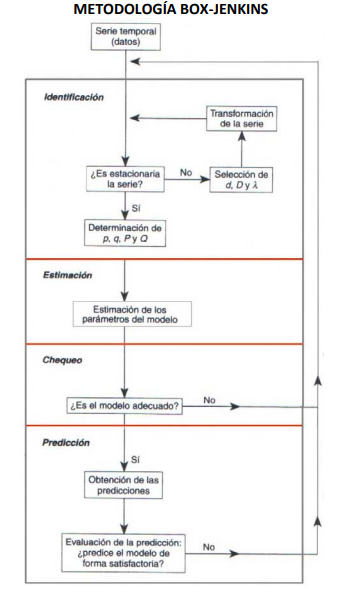


## Identificación

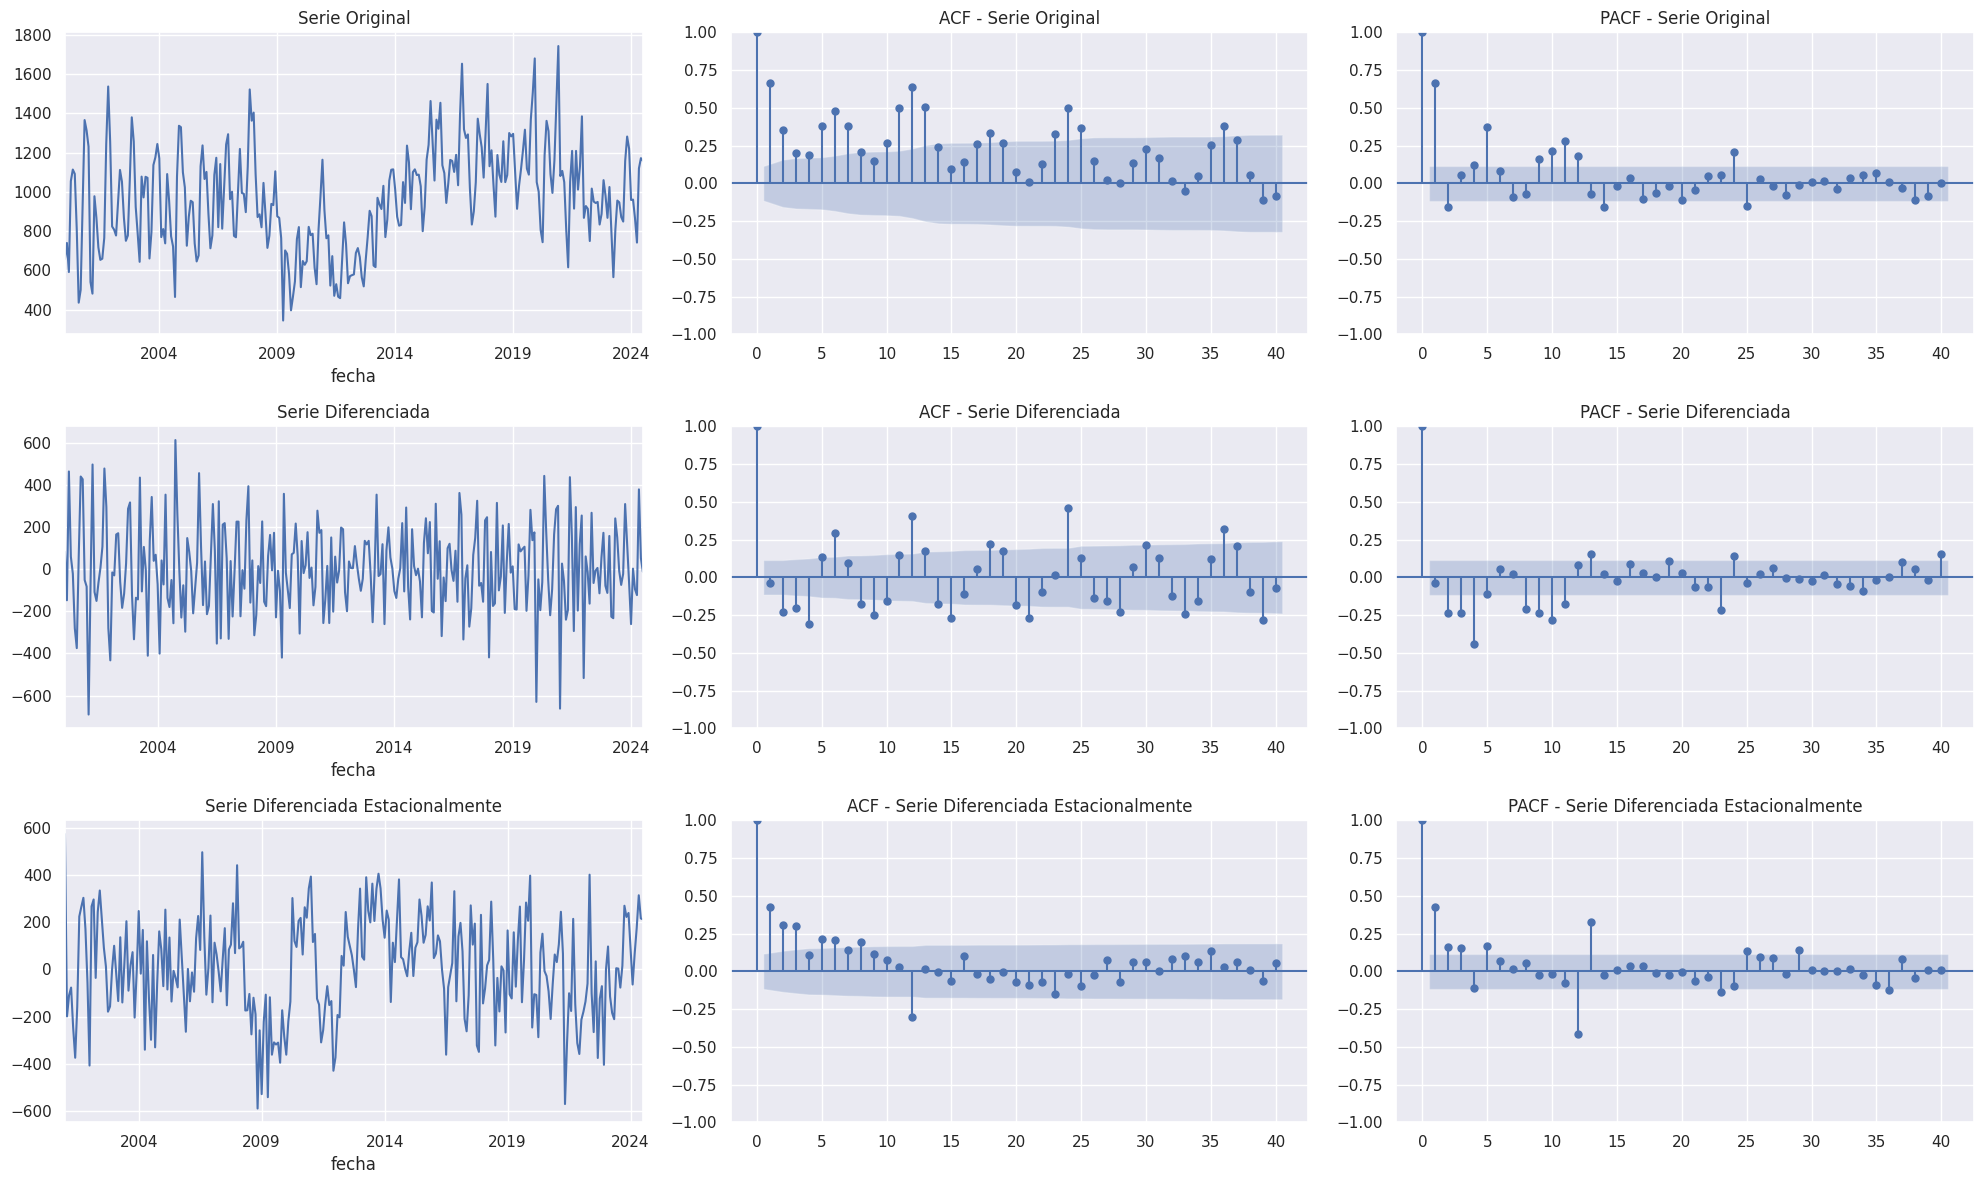

In [7]:
plot_time_series_analysis(df,'Toneladas')

In [8]:
# prueba de Dickey Fuller para las series

from statsmodels.tsa.stattools import adfuller

SerieOriginal_adf = adfuller(df['Toneladas'])

print('ADF Statistic:', SerieOriginal_adf[0])
print('p-value:', SerieOriginal_adf[1])
print('Critical Values:')
for key, value in SerieOriginal_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -1.7459268812924058
p-value: 0.407618286387418
Critical Values:
	1%: -3.4538376962008495
	5%: -2.8718811911083093
	10%: -2.5722803076202174


ADF Statistic: -1.7459 Nos indica que se rechaza la hipotesis nula, aun asi dado que el valor p (0.4076) es mayor que 0.05, no podemos rechazar la hipótesis nula , lo que indica que la serie no está estacionaria .
Los valores criticos nos indican que serie no estacionaria.


In [9]:
SerieDiferenciada_adf = adfuller(df['Toneladas'].diff().dropna())

print('ADF Statistic:', SerieDiferenciada_adf[0])
print('p-value:', SerieDiferenciada_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciada_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -6.352779432247492
p-value: 2.5863021436763534e-08
Critical Values:
	1%: -3.4538376962008495
	5%: -2.8718811911083093
	10%: -2.5722803076202174


El valor del ADF es -6.3528, lo cual es mucho más negativo que todos los valores críticos para los niveles del 1%, 5% y 10%. Esto nos dice que hay una fuerte evidencia para rechazar la hipótesis nula (de que la serie no es estacionaria). Sin embargo el valor p 2.5863021 indica que la serie es estacionaria. Los valores criticos son negativos indicando que es estacionaria.

In [10]:
SerieDiferenciadaEst_adf = adfuller(df['Toneladas'].diff(12).dropna())

print('ADF Statistic:', SerieDiferenciadaEst_adf[0])
print('p-value:', SerieDiferenciadaEst_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciadaEst_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -3.8483194170255364
p-value: 0.00244988216053333
Critical Values:
	1%: -3.4548039258751206
	5%: -2.872304928618605
	10%: -2.5725063100137175


El valor del ADF Statistic es -3.8483, que es más negativo que los valores críticos esto indica que podemos rechazar la hipótesis nula. El valor p es 0.0024, que es significativamente menor que 0,05, esto indica que hay una evidencia estadística fuerte para rechazar la hipótesis nula.
La estadística ADF ( -3.8483) es más negativa que los valores críticos, por lo tanto, puedes rechazar la hipótesis nula con confianza en todos los niveles.
Dado que el estadístico ADF es más negativo que los valores críticos y el p-value es muy bajo ( 0.0024), se concluye que la serie es estacionaria . No es necesario aplicar diferenciación adicional ni transformaciones para hacerla estacionaria.

In [11]:
Entrenamiento_df= df[:283]
Prueba_df= df[283:]

display(Prueba_df,Entrenamiento_df)

,Toneladas
fecha,
2023-08-01,872.000000
2023-09-01,849.000000
2023-10-01,1157.458473
2023-11-01,1282.106637
2023-12-01,1220.000000
2024-01-01,959.000000
2024-02-01,961.000000
2024-03-01,865.532563
2024-04-01,742.000000


,Toneladas
fecha,
2000-01-01,658.000000
2000-02-01,740.000000
2000-03-01,592.000000
2000-04-01,1055.000000
2000-05-01,1114.000000
...,...
2023-03-01,799.000000
2023-04-01,565.867207
2023-05-01,806.195506


In [12]:
import pmdarima as pm

modelo1 = pm.auto_arima(Entrenamiento_df,seasonal=True,m=12,
                        d=1,D=1,start_p=0,start_q=0, max_p= 4, max_q=4,
                        start_P=0,start_Q=0, max_P= 4, max_Q=4,
                        information_criterion='bic',trace=True, error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=3701.399, Time=0.21 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=3570.694, Time=2.98 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=3512.461, Time=2.63 sec
 ARIMA(0,1,1)(0,1,0)[12]             : BIC=3626.224, Time=0.38 sec
 ARIMA(0,1,1)(1,1,1)[12]             : BIC=3516.175, Time=4.57 sec
 ARIMA(0,1,1)(0,1,2)[12]             : BIC=3516.317, Time=5.62 sec
 ARIMA(0,1,1)(1,1,0)[12]             : BIC=3544.640, Time=1.84 sec
 ARIMA(0,1,1)(1,1,2)[12]             : BIC=inf, Time=12.52 sec
 ARIMA(0,1,0)(0,1,1)[12]             : BIC=3570.061, Time=2.20 sec
 ARIMA(1,1,1)(0,1,1)[12]             : BIC=3507.862, Time=5.65 sec
 ARIMA(1,1,1)(0,1,0)[12]             : BIC=3625.368, Time=0.43 sec
 ARIMA(1,1,1)(1,1,1)[12]             : BIC=3511.578, Time=3.21 sec
 ARIMA(1,1,1)(0,1,2)[12]             : BIC=3511.958, Time=6.75 sec
 ARIMA(1,1,1)(1,1,0)[12]             : BIC=3538.104, Time=2.01 sec
 ARIMA(1,1,1)(1,1,2)[12

In [13]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  283
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1742.478
Date:                              Sat, 12 Oct 2024   AIC                           3492.957
Time:                                      13:31:34   BIC                           3507.350
Sample:                                  01-01-2000   HQIC                          3498.736
                                       - 07-01-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5293      0.064     -8.230      0.000      -0.655      -0.403
ma.L2         -0.2152      0.062     -3.473      0.001      -0.337      -0.094
ma.S.L12      -0.7570      0.041    -18.318      0.000      -0.838      -0.676
sigma2      2.268e+04   1667.080     13.604      0.000    1.94e+04    2.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 9.90
Prob(Q):                              0.86   Prob(JB):                         0.01
Heteroskedasticity (H):               0.96   Skew:                            -0.28
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predicción


In [14]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo_SM = SARIMAX(Entrenamiento_df,order=(0,1,2),seasonal=(0,1,1,12))
modeloSM_fit = modelo_SM.fit(disp=0)
modeloSM_fit.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Toneladas   No. Observations:                  283
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1873.150
Date:                Sat, 12 Oct 2024   AIC                           3752.299
Time:                        13:31:35   BIC                           3763.225
Sample:                    01-01-2000   HQIC                          3756.680
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3235      0.048     -6.737      0.000      -0.418      -0.229
ma.L2         -0.5058      0.054     -9.318      0.000      -0.612      -0.399
sigma2      3.429e+04   3100.538     11.059      0.000    2.82e+04    4.04e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.47   Prob(JB):                         0.67
Heteroskedasticity (H):               0.78   Skew:                             0.02
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
Pr_stmodels = modeloSM_fit.get_forecast(steps=12).predicted_mean
print ( Pr_stmodels)

2023-08-01    924.218707
2023-09-01    913.771266
2023-10-01    913.771266
2023-11-01    913.771266
2023-12-01    913.771266
2024-01-01    913.771266
2024-02-01    913.771266
2024-03-01    913.771266
2024-04-01    913.771266
2024-05-01    913.771266
2024-06-01    913.771266
2024-07-01    913.771266
Freq: MS, Name: predicted_mean, dtype: float64


In [70]:
from skforecast.Sarimax import Sarimax


modelo_SK = Sarimax(order=(0,1,2),seasonal_order=(0,1,1,12))
modelo_SK.fit(y=Entrenamiento_df)
modelo_SK.summary()


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Toneladas   No. Observations:                  283
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1742.478
Date:                              Sat, 12 Oct 2024   AIC                           3492.957
Time:                                      13:50:27   BIC                           3507.350
Sample:                                  01-01-2000   HQIC                          3498.736
                                       - 07-01-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5293      0.064     -8.230      0.000      -0.655      -0.403
ma.L2         -0.2152      0.062     -3.473      0.001      -0.337      -0.094
ma.S.L12      -0.7570      0.041    -18.318      0.000      -0.838      -0.676
sigma2      2.268e+04   1667.080     13.604      0.000    1.94e+04    2.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 9.90
Prob(Q):                              0.86   Prob(JB):                         0.01
Heteroskedasticity (H):               0.96   Skew:                            -0.28
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
Pr_skforecast = modelo_SK.predict(steps=12)
print(Pr_skforecast)

                   pred
2023-08-01   845.322013
2023-09-01   820.765616
2023-10-01   892.993551
2023-11-01  1064.065717
2023-12-01  1156.111881
2024-01-01   825.369708
2024-02-01   851.285140
2024-03-01   711.549760
2024-04-01   585.344121
2024-05-01   762.591987
2024-06-01   873.375366
2024-07-01   915.295164


In [18]:
modelo_PD = pm.ARIMA(order=(0,1,2),seasonal_order=(0,1,1,12))
modelo_PD.fit(y=Entrenamiento_df)
modelo_PD.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  283
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1742.333
Date:                              Sat, 12 Oct 2024   AIC                           3494.665
Time:                                      13:31:43   BIC                           3512.657
Sample:                                  01-01-2000   HQIC                          3501.890
                                       - 07-01-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3656      0.696     -0.525      0.600      -1.730       0.999
ma.L1         -0.5300      0.064     -8.241      0.000      -0.656      -0.404
ma.L2         -0.2165      0.062     -3.477      0.001      -0.339      -0.094
ma.S.L12      -0.7575      0.041    -18.419      0.000      -0.838      -0.677
sigma2      2.265e+04   1677.377     13.504      0.000    1.94e+04    2.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                10.17
Prob(Q):                              0.84   Prob(JB):                         0.01
Heteroskedasticity (H):               0.95   Skew:                            -0.28
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
Pr_pmdarima = modelo_PD.predict(steps=12)
print(Pr_pmdarima)

2023-08-01     839.414737
2023-09-01     812.044766
2023-10-01     882.938253
2023-11-01    1052.488375
2023-12-01    1142.983977
2024-01-01     810.851468
2024-02-01     835.113498
2024-03-01     693.886122
2024-04-01     566.358184
2024-05-01     742.062621
Freq: MS, dtype: float64


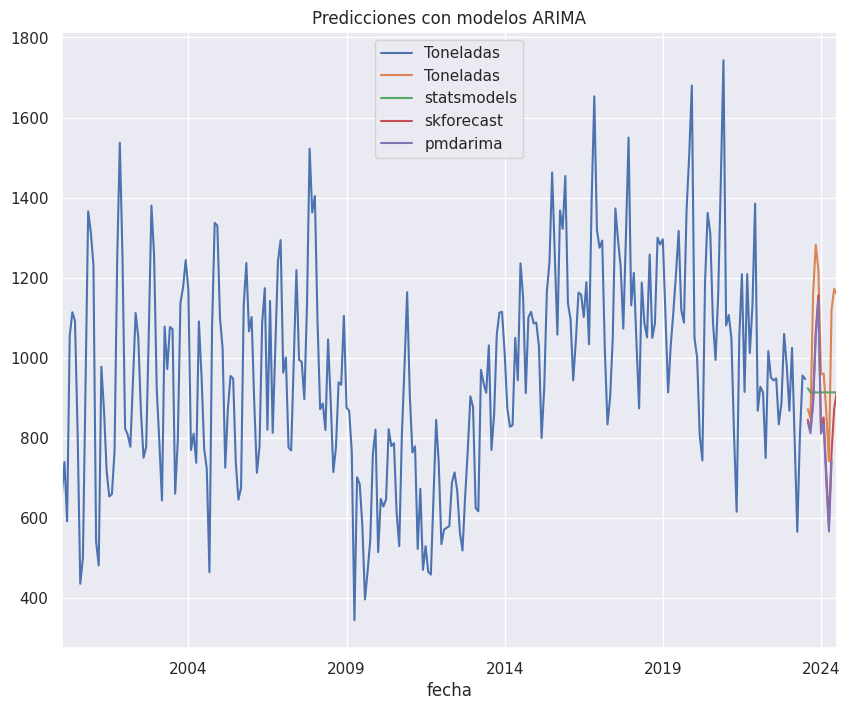

In [79]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(10 , 8))
Entrenamiento_df.plot(ax=ax,label='Entrenamiento')
Prueba_df.plot(ax=ax,label='Prueba')
Pr_stmodels.plot(ax=ax, label='statsmodels')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
Pr_pmdarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()

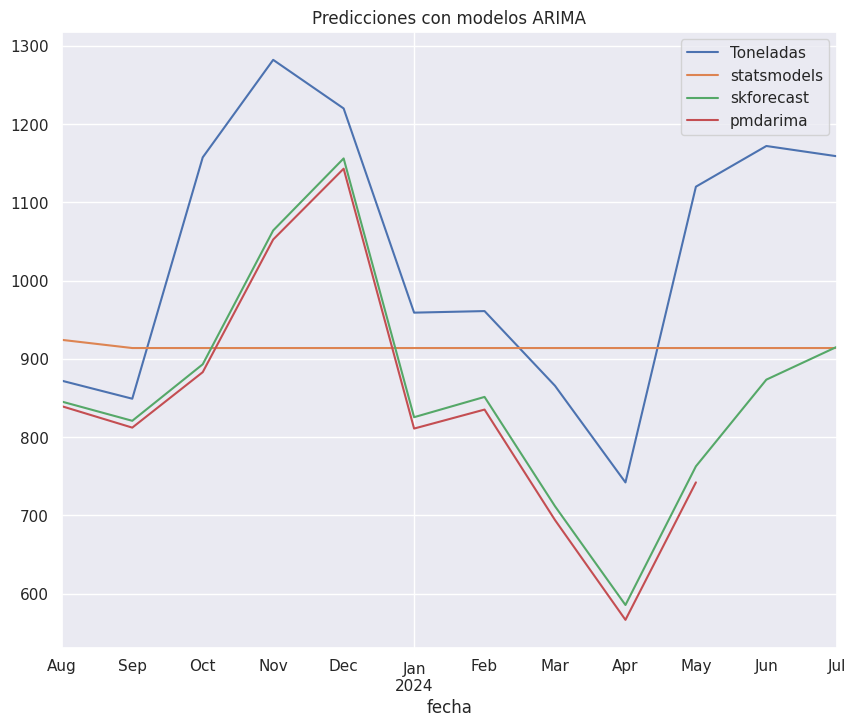

In [80]:
fig, ax = plt.subplots(figsize=(10 , 8))

Prueba_df.plot(ax=ax,label='Prueba')
Pr_stmodels.plot(ax=ax, label='statsmodels')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
Pr_pmdarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()


In [73]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["Toneladas"],Pr_skforecast)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Toneladas'],Pr_skforecast):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Toneladas'],Pr_skforecast):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Toneladas'], Pr_skforecast)*100:.2f}%")

MAE 171.24
MSE: 39789.40
RMSE: 199.47
MAPE: 16.18%


In [74]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["Toneladas"],Pr_stmodels)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Toneladas'],Pr_stmodels):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Toneladas'],Pr_stmodels):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Toneladas'], Pr_stmodels)*100:.2f}%")

MAE 171.44
MSE: 41762.80
RMSE: 204.36
MAPE: 15.70%


In [81]:
Pr_skforecast1 = Pr_skforecast.copy()
Pr_skforecast1 = modelo_SK.predict(steps=17)
print(Pr_skforecast1)

                   pred
2023-08-01   845.322013
2023-09-01   820.765616
2023-10-01   892.993551
2023-11-01  1064.065717
2023-12-01  1156.111881
2024-01-01   825.369708
2024-02-01   851.285140
2024-03-01   711.549760
2024-04-01   585.344121
2024-05-01   762.591987
2024-06-01   873.375366
2024-07-01   915.295164
2024-08-01   808.079788
2024-09-01   778.015912
2024-10-01   850.243847
2024-11-01  1021.316014
2024-12-01  1113.362177


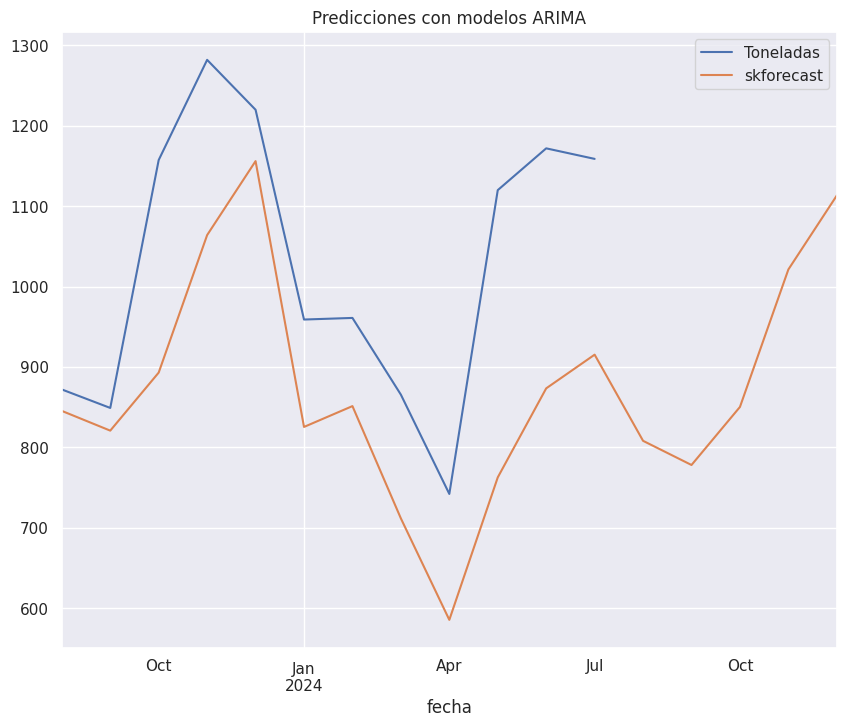

In [82]:
fig, ax = plt.subplots(figsize=(10 , 8))

Prueba_df.plot(ax=ax,label='Prueba')
Pr_skforecast1.columns = ['skforecast']
Pr_skforecast1.plot(ax=ax, label='skforecast')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()

# Suavizado Exponencial


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Suavizado exponencial simple'}, xlabel='fecha'>

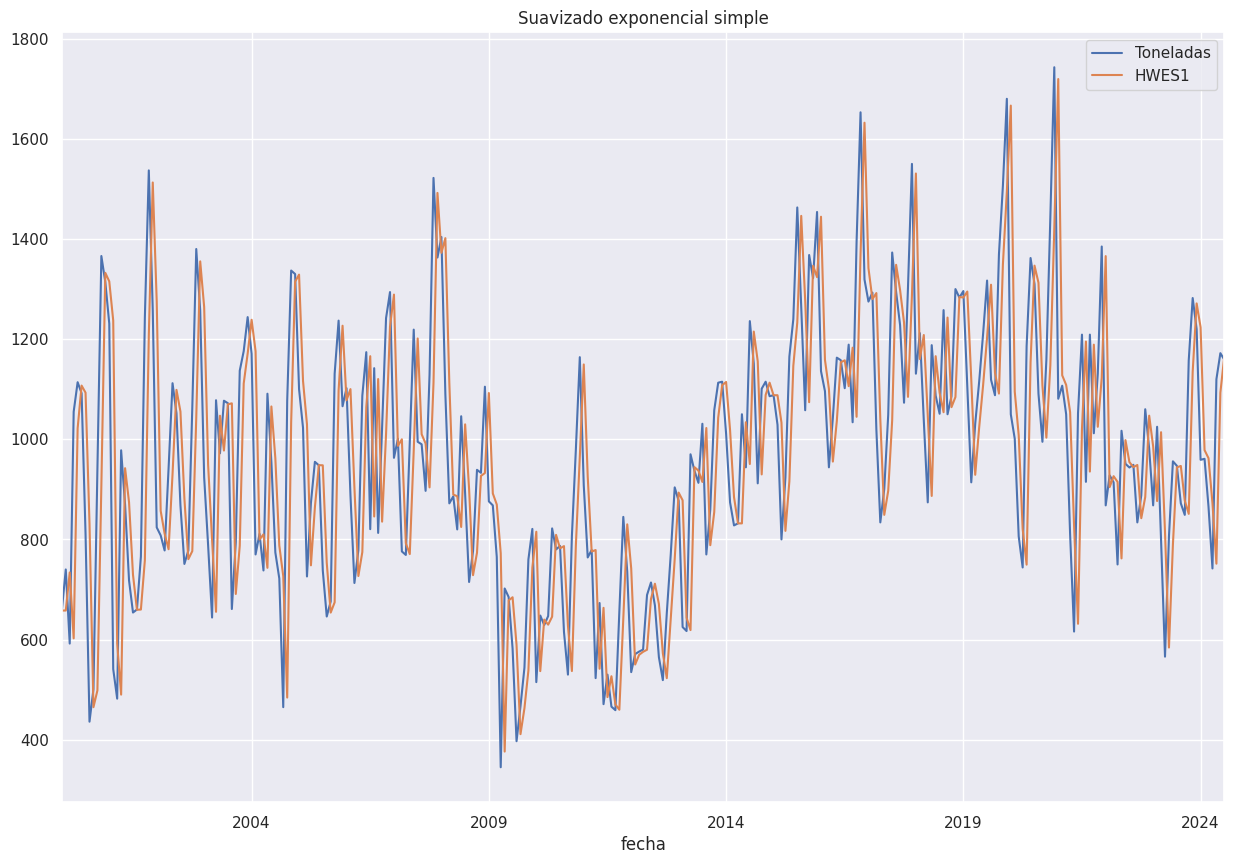

In [22]:
df_s = df.copy()

#Suavisado Exponencial Simple

df_s['HWES1'] = SimpleExpSmoothing(df_s['Toneladas']).fit(optimized=True,use_brute=True).fittedvalues
df_s[['Toneladas','HWES1']].plot(title = 'Suavizado exponencial simple',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Suavizado exponencial doble'}, xlabel='fecha'>

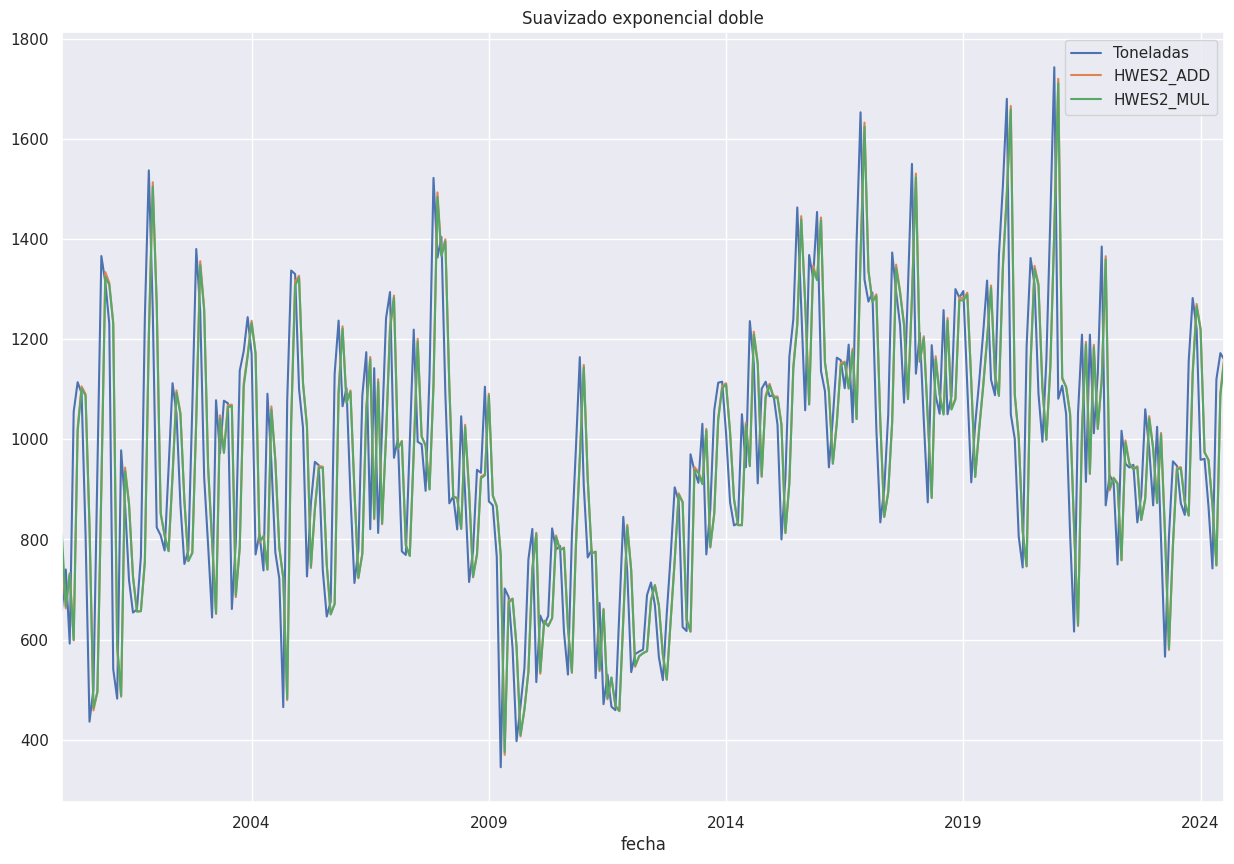

In [23]:
# Suavizado Exponencial doble

df_s['HWES2_ADD'] = ExponentialSmoothing(df_s['Toneladas'],trend='add').fit().fittedvalues
df_s['HWES2_MUL'] = ExponentialSmoothing(df_s['Toneladas'],trend='mul').fit().fittedvalues
df_s[['Toneladas', 'HWES2_ADD','HWES2_MUL']].plot(title = 'Suavizado exponencial doble',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: title={'center': 'Suavizado exponencial triple'}, xlabel='fecha'>

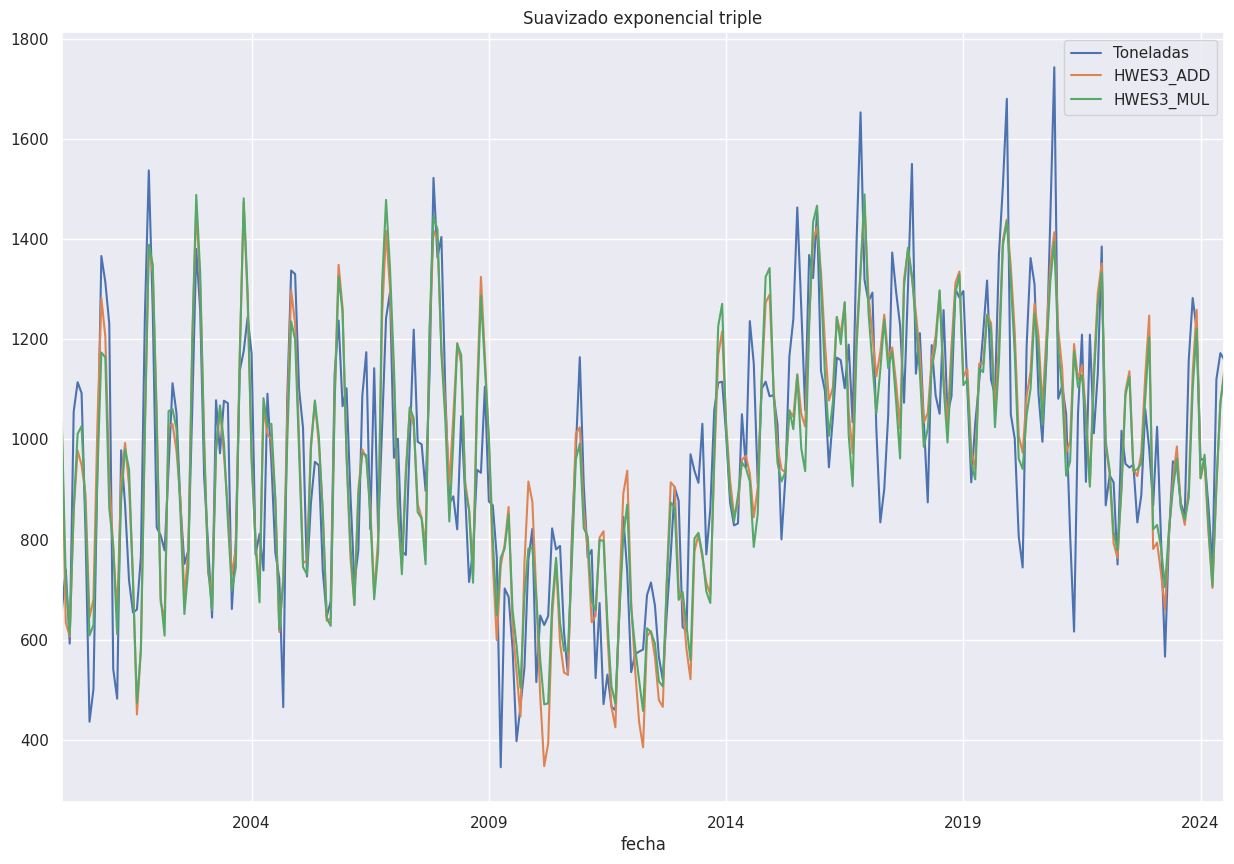

In [24]:
df_s['HWES3_ADD'] = ExponentialSmoothing(df_s['Toneladas'],trend='add',seasonal='add',seasonal_periods = 12).fit().fittedvalues
df_s['HWES3_MUL'] = ExponentialSmoothing(df_s['Toneladas'],trend='mul',seasonal='mul',seasonal_periods = 12).fit().fittedvalues
df_s[['Toneladas', 'HWES3_ADD','HWES3_MUL']].plot(title = 'Suavizado exponencial triple',figsize=(15,10))

In [25]:
# Partiendo los datos entre entrenamiento y prueba

Entrenamiento_df_s= df_s[:283]
Prueba_df_s= df_s[283:]

display(Prueba_df_s,Entrenamiento_df_s)

,Toneladas,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
fecha,,,,,,
2023-08-01,872.000000,946.768659,944.304062,942.476950,866.941573,864.159999
2023-09-01,849.000000,877.474597,874.239940,873.684386,829.172468,839.349850
2023-10-01,1157.458473,851.084923,848.186570,847.325186,900.626460,883.383253
2023-11-01,1282.106637,1135.025657,1135.070344,1129.292268,1133.090090,1100.656392
2023-12-01,1220.000000,1271.337298,1270.259484,1265.303392,1258.579599,1220.978361
2024-01-01,959.000000,1223.758941,1220.912092,1218.387087,921.895621,922.181973
2024-02-01,961.000000,978.385775,973.545592,974.586140,957.784801,969.225801
2024-03-01,865.532563,962.272995,959.399073,958.043058,812.077775,824.957835
2024-04-01,742.000000,872.615943,869.171647,868.914324,702.984947,706.707706


,Toneladas,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
fecha,,,,,,
2000-01-01,658.000000,658.000000,766.528474,812.145455,1026.694957,1033.620866
2000-02-01,740.000000,658.000000,662.327741,666.332674,634.005039,718.381172
2000-03-01,592.000000,733.995921,732.293900,730.768671,606.219017,610.062188
2000-04-01,1055.000000,602.397008,598.367819,599.498852,857.701232,859.183647
2000-05-01,1114.000000,1021.860195,1022.843606,1015.488622,977.450577,1010.981304
...,...,...,...,...,...,...
2023-03-01,799.000000,1014.136178,1012.752731,1009.265455,732.088002,783.239951
2023-04-01,565.867207,814.752373,810.375690,811.510733,659.894864,704.986618
2023-05-01,806.195506,584.090697,579.170205,582.004429,811.981930,819.278643


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


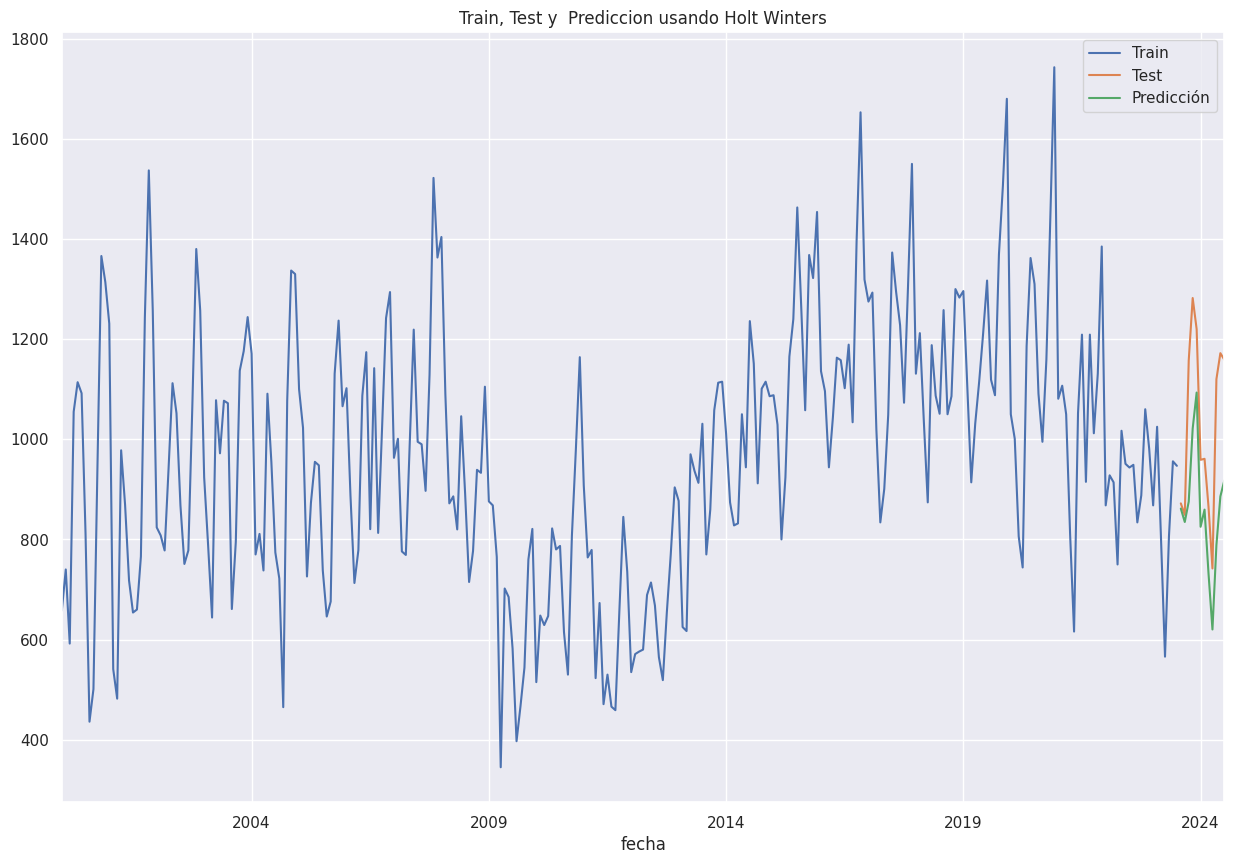

In [26]:
fitted_model = ExponentialSmoothing(Entrenamiento_df_s["Toneladas"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12)
Entrenamiento_df_s["Toneladas"].plot(legend=True,label="Train")
Prueba_df_s["Toneladas"].plot(legend=True,label="Test",figsize=(15,10))
test_predictions.plot(legend=True,label="Predicción")
plt.title("Train, Test y  Prediccion usando Holt Winters");

<Axes: xlabel='fecha'>

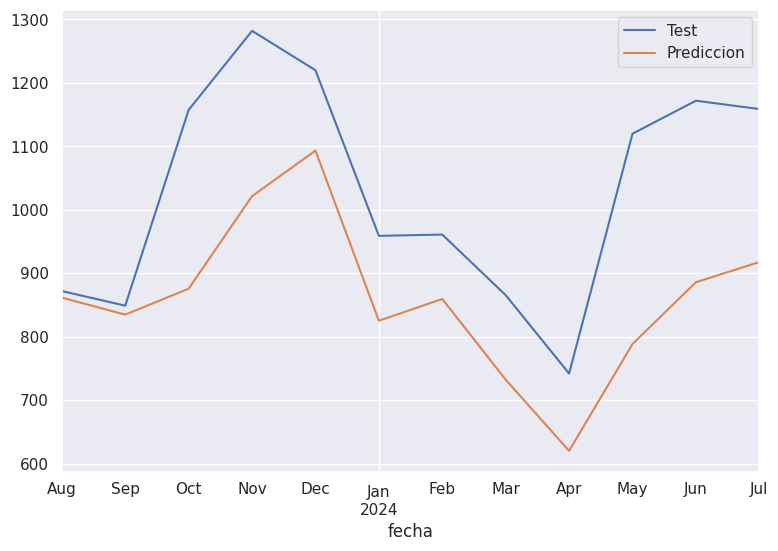

In [27]:
Prueba_df_s['Toneladas'].plot(legend=True,label="Test",figsize=(9,6))
test_predictions.plot(legend=True,label="Prediccion")

In [28]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df_s["Toneladas"],test_predictions)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df_s['Toneladas'],test_predictions):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df_s['Toneladas'],test_predictions):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df_s['Toneladas'], test_predictions)*100:.2f}%")

MAE 170.22
MSE: 39527.28
RMSE: 198.81
MAPE: 15.75%


El modelo tiene en promedio, un error de aproximadamente **170.22** unidades (toneladas). Lo que nos indicar que este valor corresponde al 15.75%

# Prophet

In [29]:
%pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
df_p = df.copy()
df_p.reset_index(inplace=True)
df_p.rename(columns={'fecha':'ds','Toneladas':'y'}, inplace=True)
df_p

,ds,y
0,2000-01-01,658.000000
1,2000-02-01,740.000000
2,2000-03-01,592.000000
3,2000-04-01,1055.000000
4,2000-05-01,1114.000000
...,...,...
290,2024-03-01,865.532563
291,2024-04-01,742.000000
292,2024-05-01,1120.000000
293,2024-06-01,1172.000000


In [31]:
Entrenamiento_df_p= df_p[:283]
Prueba_df_p= df_p[283:]

display(Entrenamiento_df_p.tail(), Prueba_df_p.tail())

,ds,y
278,2023-03-01,799.000000
279,2023-04-01,565.867207
280,2023-05-01,806.195506
281,2023-06-01,956.000000
282,2023-07-01,947.000000


,ds,y
290,2024-03-01,865.532563
291,2024-04-01,742.000000
292,2024-05-01,1120.000000
293,2024-06-01,1172.000000
294,2024-07-01,1158.883752


In [32]:
modelo = Prophet(growth='linear')

modelo.fit(Entrenamiento_df_p)

prophet    INFO  Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
prophet    INFO  Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
cmdstanpy  DEBUG input tempfile: /tmp/tmpby89l3y0/2ymym9yv.json
cmdstanpy  DEBUG input tempfile: /tmp/tmpby89l3y0/3r09wa9u.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83984', 'data', 'file=/tmp/tmpby89l3y0/2ymym9yv.json', 'init=/tmp/tmpby89l3y0/3r09wa9u.json', 'output', 'file=/tmp/tmpby89l3y0/prophet_model5nqfp02i/prophet_model-20241012133201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:01 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
13:32:01 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done processing


In [33]:
future = modelo.make_future_dataframe(periods=15,freq='MS')
forecast = modelo.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2000-01-01,971.760736,716.862714,1218.042218
1,2000-02-01,891.200217,639.039844,1134.055975
2,2000-03-01,756.027735,516.755021,1011.347339
3,2000-04-01,792.484218,572.310406,1027.074837
4,2000-05-01,936.917104,692.223644,1177.236746
...,...,...,...,...
293,2024-06-01,1137.388975,875.148020,1381.169518
294,2024-07-01,1098.078033,842.324110,1349.066772
295,2024-08-01,992.639971,752.395597,1246.772059
296,2024-09-01,951.028781,716.831061,1183.797825


/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


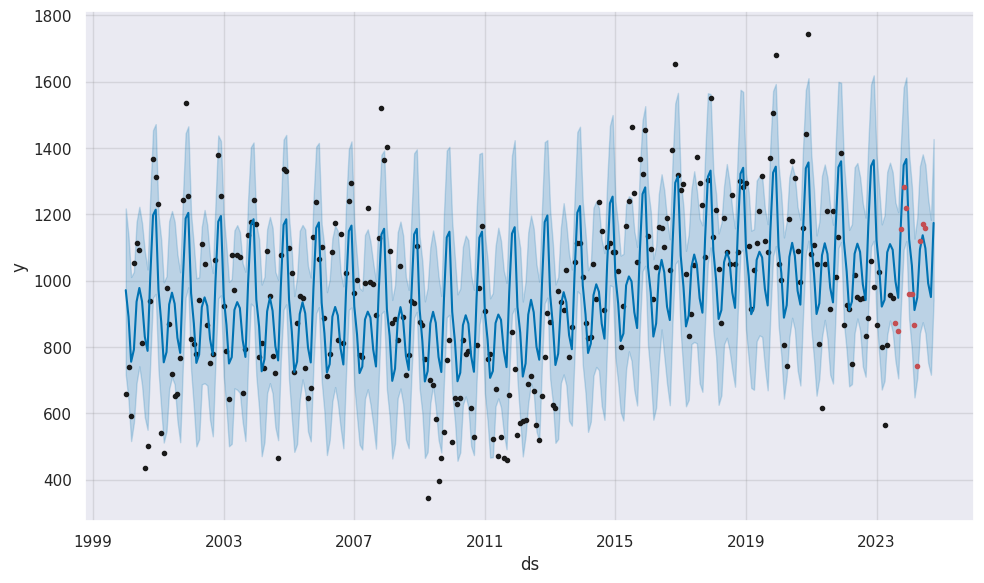

In [34]:
fig = modelo.plot(forecast)
ax = fig.gca()
ax.plot(Prueba_df_p['ds'],Prueba_df_p['y'],'r.')

/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an nda

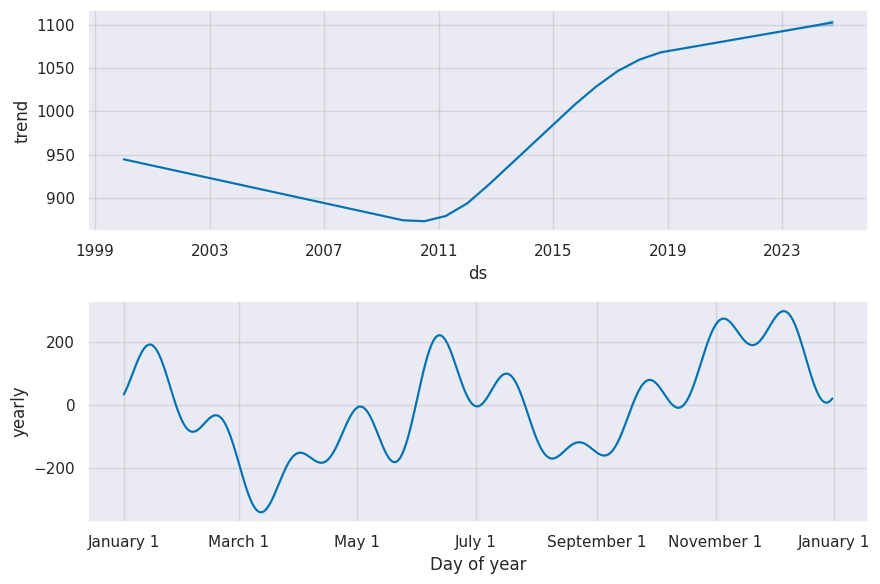

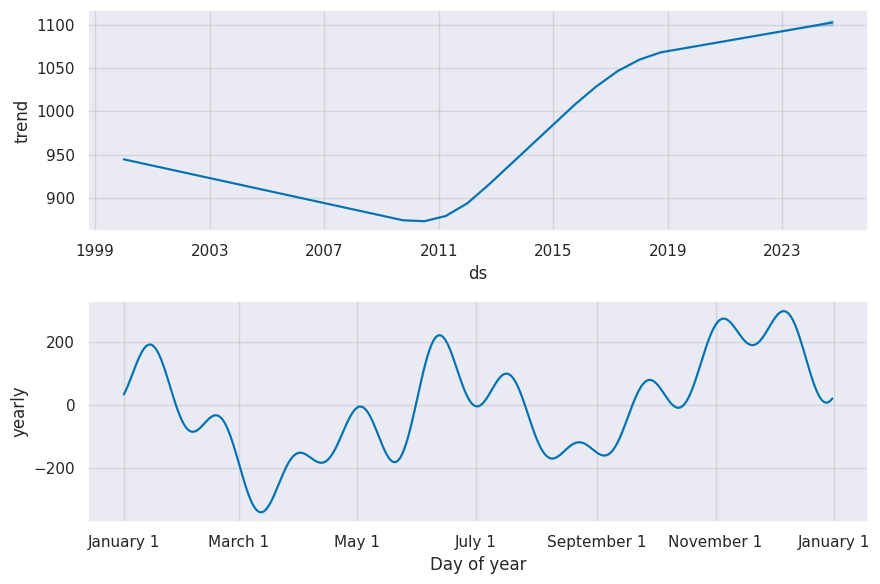

In [35]:
modelo.plot_components(forecast)

/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


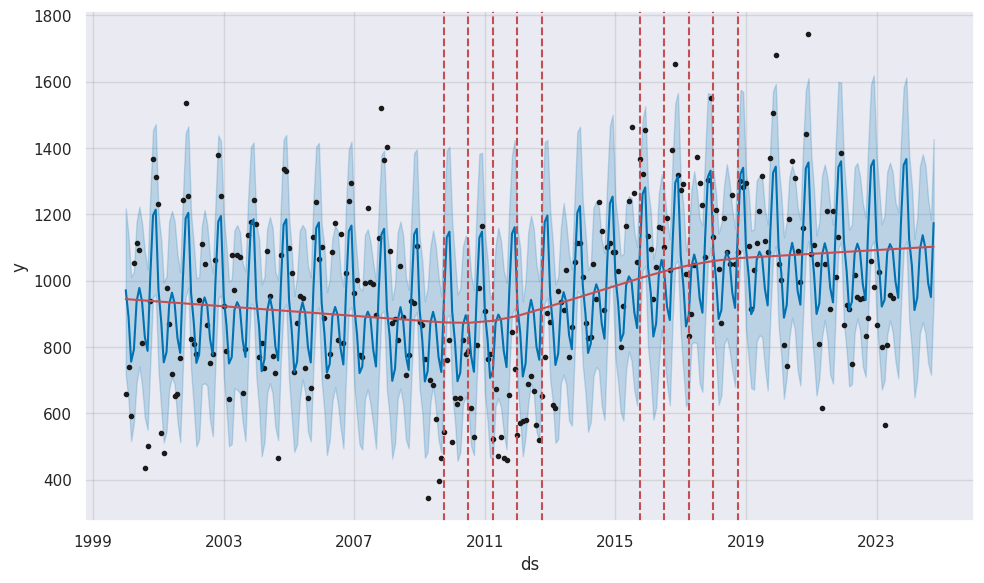

In [36]:
fig = modelo.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), modelo,forecast)

Las lines rojas nos muestran los puntos de corte donde se presento un pico en la serie.

Para este caso se cuenta con diez punto de corte:

*     2009: Para este año las lluvias fueron intensas y prolongadas, causadas por el fenómeno de La Niña. Las precipitaciones excesivas y el aumento de la nubosidad afectarán el proceso de floración y maduración del fruto del café, reduciendo tanto la cantidad como la calidad del grano.

*     2010: Durante este año, se implementó un programa masivo de renovación de cafetales en Colombia. Muchos de los cultivos estaban viejos, lo que redujo la productividad. Para mejorar las cosechas futuras, se promovió el cultivo nuevas variedades resistentes a la roya, una enfermedad que afecta al café. Aun así estas nuevas plantas tardan en madurar, lo que contribuyó a la caída de la producción durante la transición.

*     2011: Este año se presento uno de los peores eventos de La Niña, con lluvias más prolongadas de lo normal. Esto impactó directamente la floración del café, retrasando las cosechas y afectando la cantidad y calidad del grano. La presencia de altos niveles de humedad en las plantaciones, lo que no solo afectó la floración y maduración de los frutos, sino que también aumentó la vulnerabilidad de los cultivos a enfermedades como la roya y otros hongos.


*     2012: En este año las condiciones climáticas adversas persistieron, aunque fueron menos severas que en 2010 y 2011.

*     2013: Para 2013, muchas de las nuevas variedades resistentes a la roya plantadas en los años anteriores empezaron a alcanzar su plena capacidad productiva. El gobierno colombiano y la Federación Nacional de Cafeteros comenzaron con la implementando programas de apoyo a los caficultores, incluyendo subsidios para insumos como fertilizantes y programas de asistencia técnica. Los caficultores adoptan prácticas más modernas y sostenibles, lo que incluye un mejor manejo del suelo y el uso de fertilizantes de manera más eficiente.


*     2016: en este año se alcanzó uno de sus puntos más altos en varios años, consolidando la recuperación que había comenzado en 2013. Las condiciones climáticas fueron generalmente más favorables para la producción de café.  Muchas de las plantaciones renovadas con variedades resistentes a la roya habían alcanzado su plena madurez productiva.


*     2017:  la industria cafetera continuaba beneficiándose de los esfuerzos de renovación de cafetales y mejores prácticas agrícolas, factores como el clima y los precios internacionales comenzaron a impactar a los productores de manera significativa.


In [37]:
df_p_cv = cross_validation(modelo, initial='720 days',period='180 days',horizon='365 days')
df_p_cv 

prophet    INFO  Making 42 forecasts with cutoffs between 2002-04-17 00:00:00 and 2022-07-01 00:00:00
  0%|          | 0/42 [00:00<?, ?it/s]prophet    INFO  n_changepoints greater than number of observations. Using 21.
cmdstanpy  DEBUG input tempfile: /tmp/tmpby89l3y0/pgex_xt6.json
cmdstanpy  DEBUG input tempfile: /tmp/tmpby89l3y0/ft9n7jie.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98278', 'data', 'file=/tmp/tmpby89l3y0/pgex_xt6.json', 'init=/tmp/tmpby89l3y0/ft9n7jie.json', 'output', 'file=/tmp/tmpby89l3y0/prophet_modelii6kh94c/prophet_model-20241012133210.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:32:10 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
13:32:10 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done process

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2002-05-01,980.788654,873.348843,1091.398262,1112.000000,2002-04-17
1,2002-06-01,555.073146,451.860237,671.849522,1052.000000,2002-04-17
2,2002-07-01,530.046194,432.722786,645.832879,868.000000,2002-04-17
3,2002-08-01,738.009758,623.341105,846.528214,751.000000,2002-04-17
4,2002-09-01,744.917166,634.253655,859.100069,778.000000,2002-04-17
...,...,...,...,...,...,...
498,2023-03-01,1045.211718,800.299343,1280.177781,799.000000,2022-07-01
499,2023-04-01,1083.619301,844.529661,1315.344372,565.867207,2022-07-01
500,2023-05-01,1222.056341,974.172151,1451.699158,806.195506,2022-07-01
501,2023-06-01,1240.620318,992.875906,1491.024783,956.000000,2022-07-01


In [38]:
df_per = performance_metrics(df_p_cv)
df_per

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,40580.017420,201.444825,159.620221,0.202765,0.144416,0.184468,0.660000
1,40 days,40252.592620,200.630488,158.627768,0.202550,0.139147,0.184099,0.660000
2,41 days,39899.919210,199.749641,157.097843,0.201338,0.139147,0.182764,0.660000
3,42 days,42802.733427,206.888215,160.854085,0.205301,0.139147,0.189971,0.660000
4,44 days,43365.109498,208.242910,162.312919,0.202887,0.139147,0.186950,0.640000
...,...,...,...,...,...,...,...,...
259,359 days,71889.477471,268.122132,205.638684,0.237451,0.199522,0.235550,0.566667
260,360 days,70130.563146,264.821757,205.210208,0.234572,0.205479,0.235969,0.550000
261,363 days,69057.870687,262.788643,200.917402,0.229053,0.191859,0.230967,0.560000
262,364 days,71092.884134,266.632489,203.667278,0.226441,0.191859,0.230313,0.540000


/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


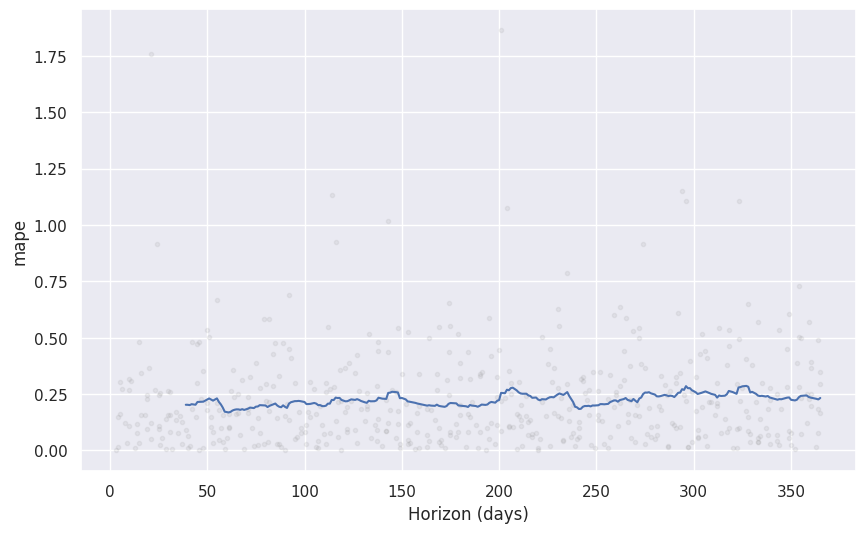

In [39]:
fig = plot_cross_validation_metric(df_p_cv, metric='mape')